# Дипломная работа  по курсу Python. Новая версия задания

## PYDA- 10

#### 1. Загрузите файл HR.csv в pandas dataframe

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [300]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('HR.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).


In [9]:
metrics = df.describe()

In [10]:
mod = []

for col in df.columns:
    m = df[col].mode()[0]
    mod.append(m)
mod

[0.1, 0.55, 4, 135, 3, 0, 0, 0, 'sales', 'low']

In [11]:
metrics.loc['moda'] = mod[:-2]

In [12]:
metrics

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
moda,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


#### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [13]:
np.round_(df.corr(), decimals=2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


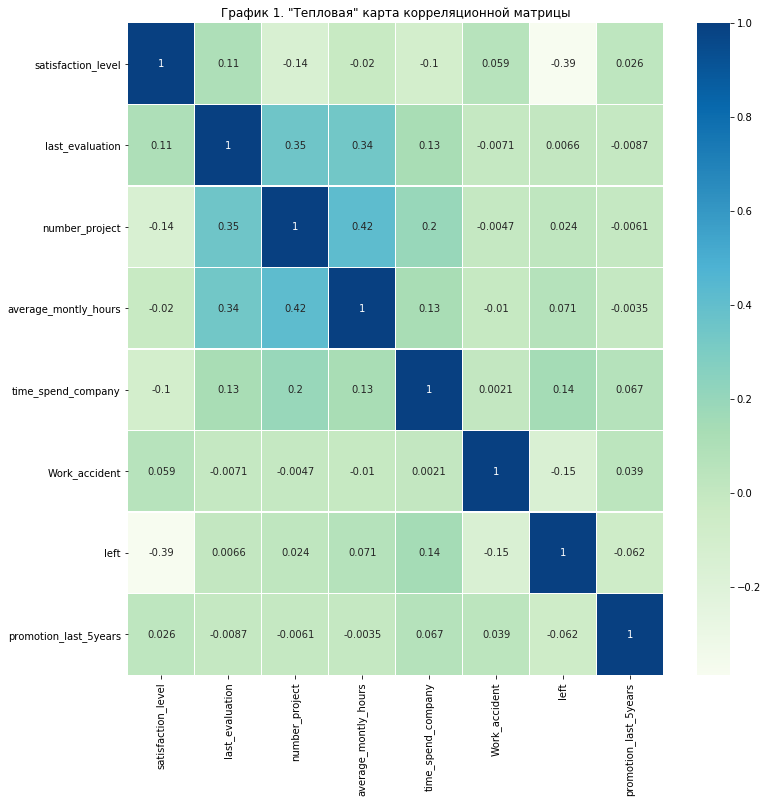

In [65]:
sns.heatmap(df.corr(),annot=True,cmap='GnBu',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('График 1. "Тепловая" карта корреляционной матрицы')
plt.show()

Выводы: 2 самые скоррелированные  переменные - average_montly_hours и number_project; две наименее скоррелированные переменные -average_montly_hours и promotion_last_5years.

#### 4. Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [25]:
dep = df['department'].value_counts(ascending=True).reset_index()
dep

,index,department
0,management,630
1,hr,739
2,accounting,767
3,RandD,787
4,marketing,858
5,product_mng,902
6,IT,1227
7,support,2229
8,technical,2720
9,sales,4140


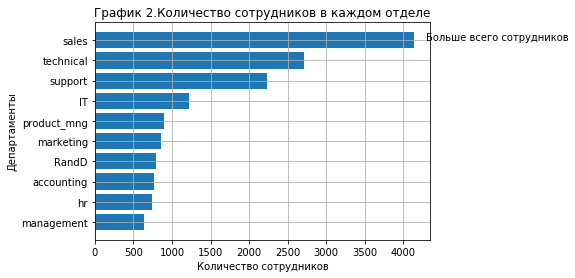

In [66]:
plt.barh(dep['index'], dep['department'])

plt.xlabel('Количество сотрудников')
plt.ylabel('Департаменты')
plt.title('График 2.Количество сотрудников в каждом отделе')
plt.text(4300, 9, 'Больше всего сотрудников')

plt.grid()

Выводы: нам даны данные за определенный период, поэтому мы можем сказать, что за период наблюдения в компании было зарегистрировано больше всего сотрудников в отделах sales, technical и support, меньше всего - в категориях hr и management. Мы можем предположить, что это какая-то техническая компания. Но по этой информации мы не можем сделать точных выводов  о структуре компании по следующим причинам: в каких-то отделах может быть бОльшая ротация сотрудников, чем в других, структура компании компании и ее отделы могли меняться во времени по мере развития бизнеса.


#### 5. Показать распределение сотрудников по зарплатам.


In [77]:
salary = df.salary.value_counts()


Text(0.5, 1.0, 'График 3. Распределение сотрудников по уровню заработной платы')

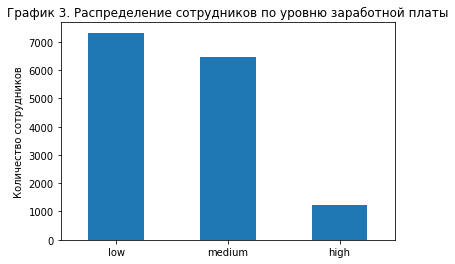

In [82]:
salary.plot(kind='bar', rot=0)

plt.ylabel('Количество сотрудников')

plt.title('График 3. Распределение сотрудников по уровню заработной платы')

Text(0.5, 1.0, 'График 4. Распределение сотрудников по уровню заработной платы по отделам')

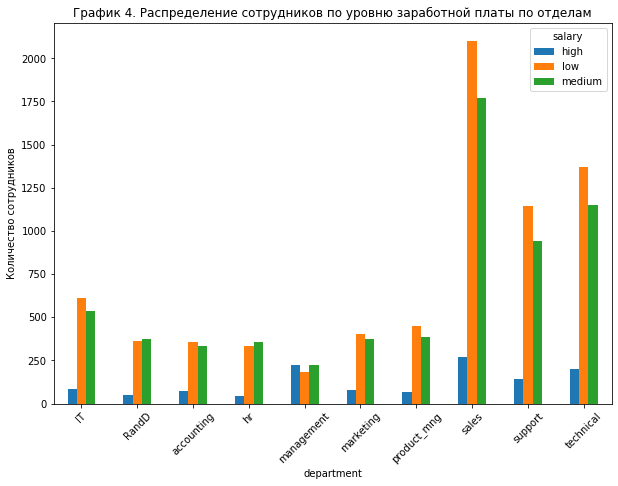

In [340]:
salary_dept = df[['department', 'salary']].groupby(['department']).salary.value_counts()
salary_dept.unstack().plot(kind='bar', rot=45)

plt.ylabel('Количество сотрудников')

plt.title('График 4. Распределение сотрудников по уровню заработной платы по отделам')

Выводы: за рассматриваемый период в компании преобладало количество сотрудников с низким уровнем заработной платы. Сотрудников со средним уровнем ЗП наблюдалось немного меньше, с высоким уровнем ЗП - существенно меньше. При этом график 4 ' Распределение сотрудников по уровню заработной платы в каждом отделе' показывает, что примерно такое распреление характерно для всех департаментов компании.

#### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [343]:
salary_dept = df[['department', 'salary']].groupby(['department']).salary.value_counts().unstack().T
salary_dept

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


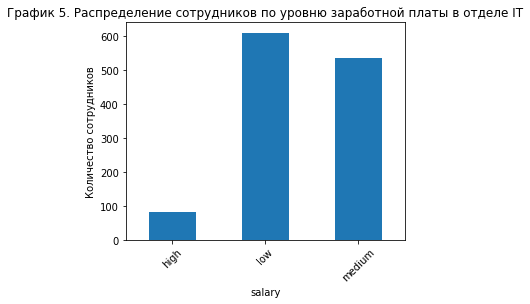

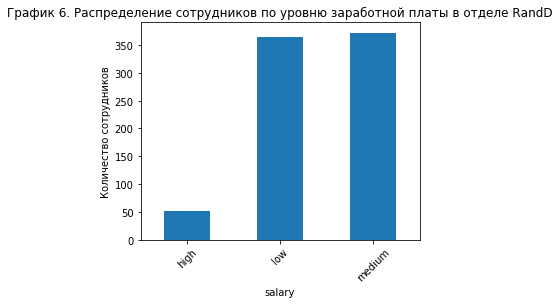

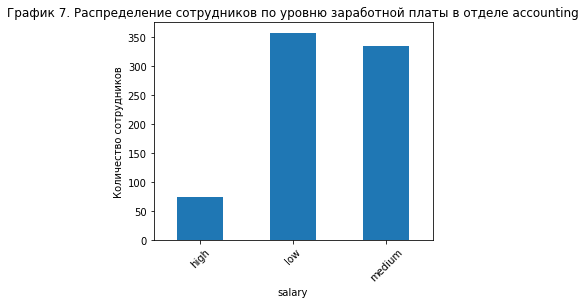

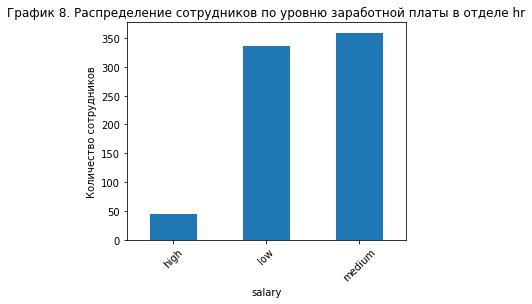

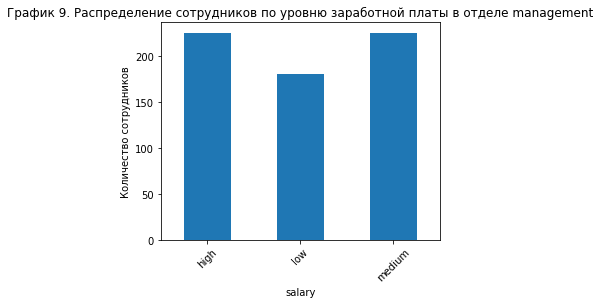

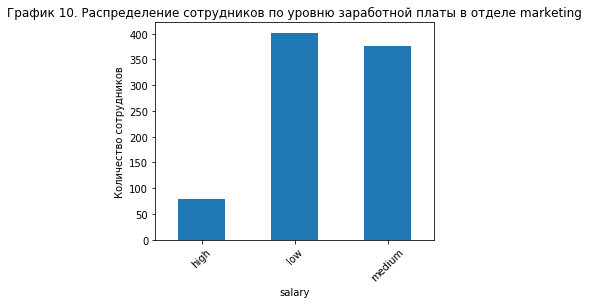

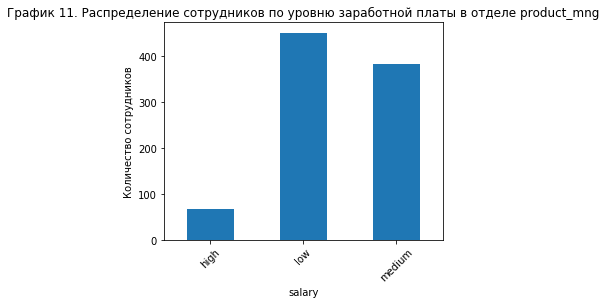

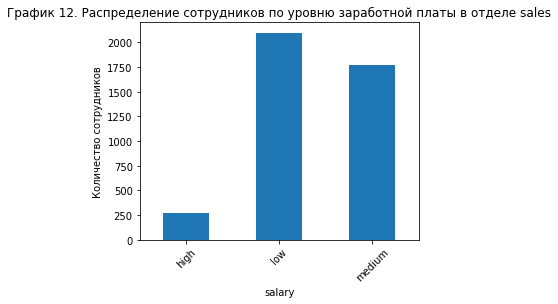

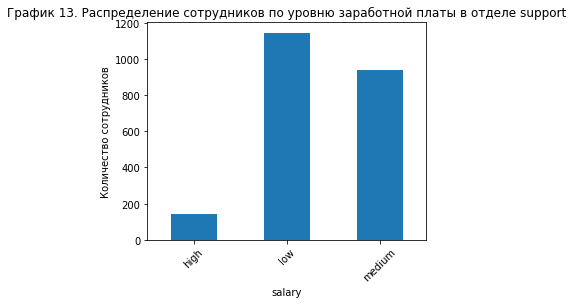

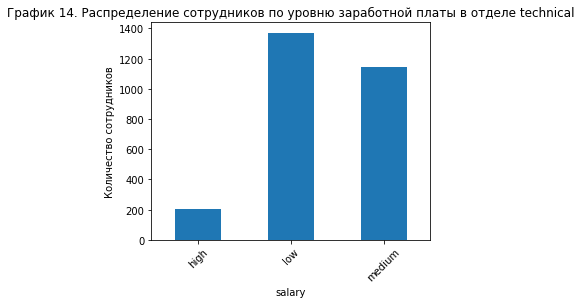

In [347]:
i = 4

for x in salary_dept.columns:
    fig = plt.figure()  
    fig.set_size_inches(5, 4) 
    salary_dept[x].plot(kind='bar', rot=45)
    plt.ylabel('Количество сотрудников')
    i = i+1
    
    plt.title(f'График {i}. Распределение сотрудников по уровню заработной платы в отделе {x}')
    plt.show()
    
    

#### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [188]:
sal_high = df[df['salary']== 'high']['average_montly_hours']
sal_high


72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: average_montly_hours, Length: 1237, dtype: int64

In [189]:
sal_low = df[df['salary']== 'low']['average_montly_hours']
sal_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

Предпосылки:

Формулируем гипотезу

H0: Сотрудники с высоким уровнем ЗП проводят на работе столько же времени, сколько и сотрудники с низким окладом.
H1: Сотрудники с высоким уровнем ЗП проводят на работе больше времени, сотрудники с низким окладом.

За уровень значимости alpha принимаем 0.05.

Мы сравниваем 2 независимые выборки. Тест односторонний, т.к. нас интересует отклонение только в одну сторону.


In [191]:
from scipy import stats as st
alpha = 0.05

result = st.ttest_ind(sal_high, sal_low, equal_var=False)
print(result)
if (result.pvalue/2 < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу


Вывод: на основе полученного t-теста со значением 0.445, превышающим заданный нами уровень значимости 5%, мы не можем опровергнуть нулевую гипотезу о том, что сотрудники с высоким уровнем ЗП проводят на работе столько же времени, сколько и сотрудники с низким окладом.

#### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

●Доля сотрудников с повышением за последние 5 лет

●Средняя степень удовлетворенности

●Среднее количество проектов


Для уволившихся:

In [227]:
left = df.groupby(df.left).promotion_last_5years.value_counts().unstack()
left['promotion_%'] = left[1]/left[0]*100
left['satisfaction_level'] = df.groupby(df.left).satisfaction_level.mean()
left['number_project'] = df.groupby(df.left).number_project.mean()
left['project_per_person'] = left['number_project']/(left[1]+left[0])
left.index = ['remained', 'left']
left

promotion_last_5years,0,1,promotion_%,satisfaction_level,number_project,project_per_person
remained,11128,300,2.695902,0.666810,3.786664,0.000331
left,3552,19,0.534910,0.440098,3.855503,0.001080


Выводы:
1. Уровень удовлетворенности у работающих сотрудников составляет 66 %, это на 22% процента выше, чем у покинувших компанию.
2. Количество продвижений за последние 5 лет в относительном выражении у работающих сотрудников  в разы выше, чем у покинувших компанию. Это может быть одним из факторов неудовлетворенности уволившихся сотрудников. Однако возможно также, что сотрудники уходили раньше, чем дослуживались до повышения. 
3. Количество проектов на 1 человека в 3 раза выше у уволившихся, чем у работающих сотрудников. Как предположение, на увольнение могли подать сотрудники компании, которые работали там много лет или работали эффективней остальных. С другой стороны, чрезмерная нагрузка проектами могла привести к неудовлетворенности и увольнению сотрудника или же уходу по состоянию здоровья или даже смерти.

#### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки

In [228]:
model_data = df.iloc[:,0:-2]

model_data 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [229]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(model_data , test_size=0.2)

In [230]:
y_train, y_test = data_train['left'], data_test['left']

In [231]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [232]:
lda = LinearDiscriminantAnalysis()

In [233]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [234]:
lda.predict(data_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [235]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [236]:
result


,0,1
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,1,1


In [237]:
from sklearn.metrics import accuracy_score

In [238]:
accuracy_score(y_test, lda.predict(data_test))

0.7613333333333333

In [239]:
from sklearn.metrics import confusion_matrix

In [243]:
confusion_matrix = pd.crosstab(result[0], result[1], rownames=['Actual'], colnames=['Predicted'])

In [244]:
confusion_matrix


Predicted,0,1
Actual,,
0,2101,196
1,520,183


Выводы по confusion_matrix. В ходе моделирования  было 2101 верное предсказание о том, что сотрудник останется работать, 183 верных предсказания, что человек покинет компанию. Также были допущены ошибки: 1 рода( 520 р) ( сотрудники были посчитаны как продолжающие работать, а на самом деле они уволились) , второго рода (196 раз) ( сотрудники были посчитаны как увольняющиеся, но они остались в компании).